
# Assignment No 4b
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of **Random Axis-Aligned** weak learner based Random Forest, i.e. you will be randomly selecting the feature from all set of features and than setting the threshold by randomly selecting a threshold.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## TODO: 

**Complete the code in files `randomForest.py`, `tree.py` and `weakLearner.py` by writing the missing code.**

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [105]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np
import math
from collections import defaultdict, Counter

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/sharan/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [106]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [107]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

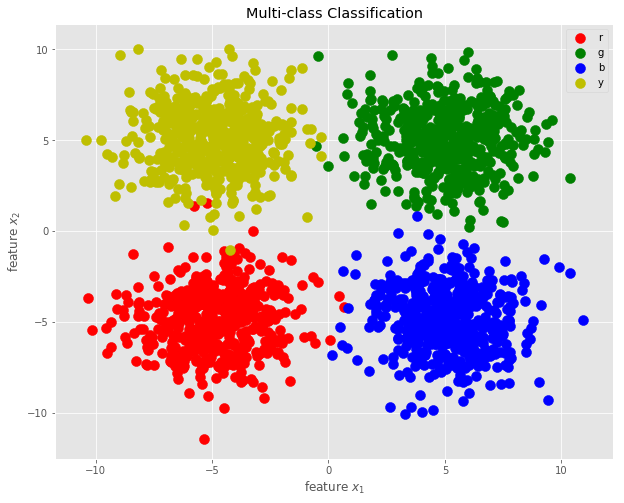

In [108]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))

In [109]:
import randomForest as rf

In [110]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random')
#rfc=rf.RandomForest(weaklearner='Axis-Aligned')

In [111]:
#%debug
rfc.train(X,Y)

In [112]:
len(rfc.trees)

10

In [113]:
Yp=rfc.predict(X)
print np.unique(Yp)
# print len(Yp)
# print np.shape(Y),np.shape(Yp)
# t.print_confusion_matrix(Yp,Y)

[ 1.]


In [91]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted,1.0,2.0,4.0,All
Actual,,,,
1.0,494,0,6,500
2.0,0,150,350,500
3.0,491,0,9,500
4.0,0,169,331,500
All,985,319,696,2000


In [ ]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

In [114]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)
print acc

AssertionError: 0.25 not greater than or equal to 0.78

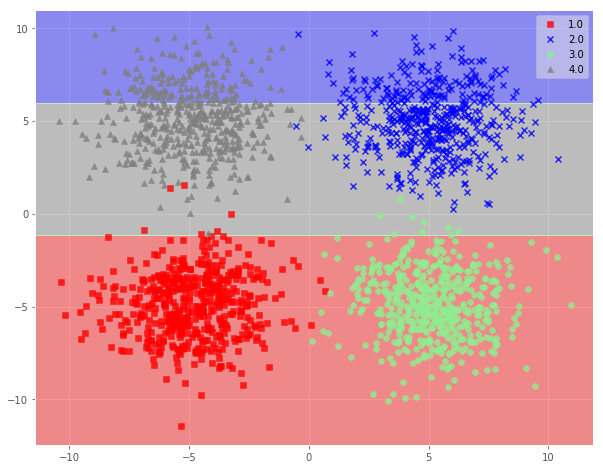

In [96]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

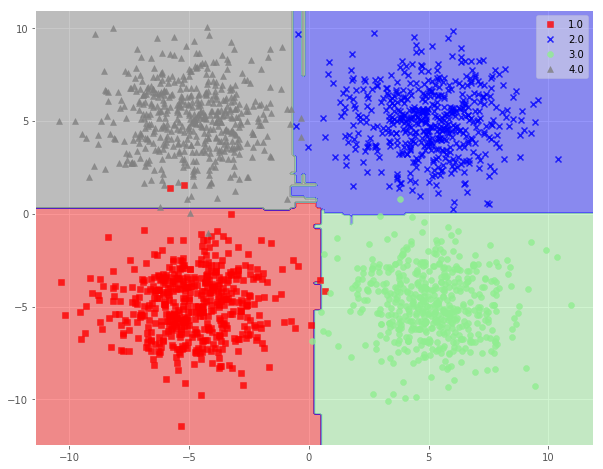

In [13]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

In [98]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Ypt.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(1000,) 1000


Predicted,1.0,2.0,4.0,All
Actual,,,,
1.0,246,0,4,250
2.0,0,69,181,250
3.0,243,0,7,250
4.0,0,83,167,250
All,489,152,359,1000


In [14]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Ypt.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(1000L, 1L) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,250,0,0,0,250
2.0,0,250,0,0,250
3.0,1,1,248,0,250
4.0,1,2,0,247,250
All,252,253,248,247,1000


In [15]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

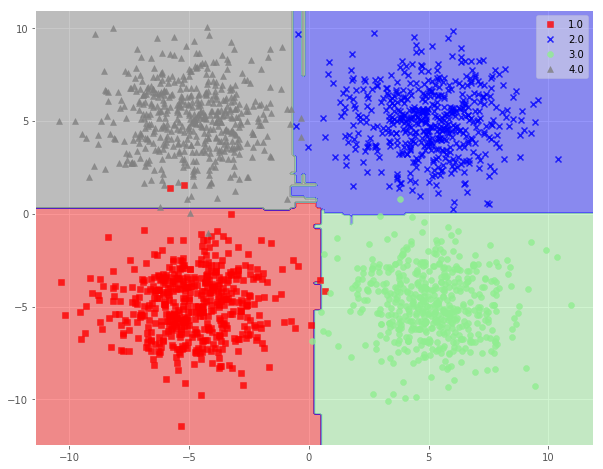

In [16]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[1.0, 2.0, 4.0]


tools.py:844: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


ValueError: array([ 3.]) is not in list

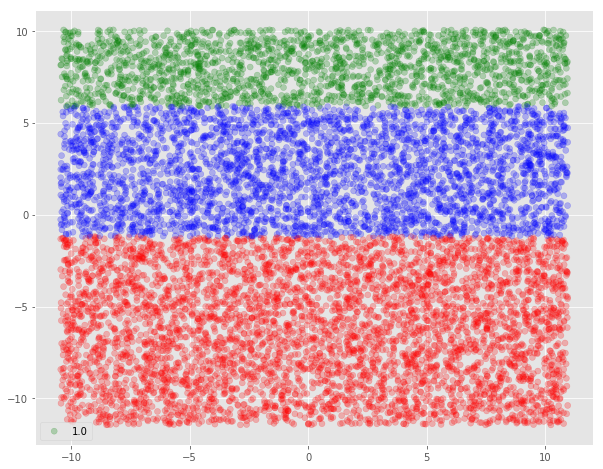

In [99]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

(10000L, 2L)
[1.0, 2.0, 3.0, 4.0]


tools.py:844: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


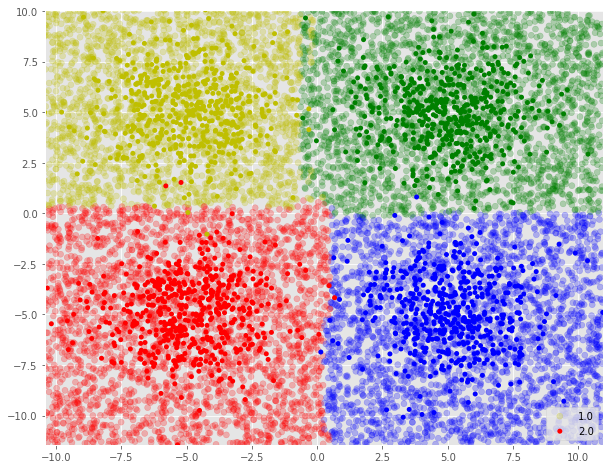

In [17]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

<function matplotlib.pyplot.tight_layout>

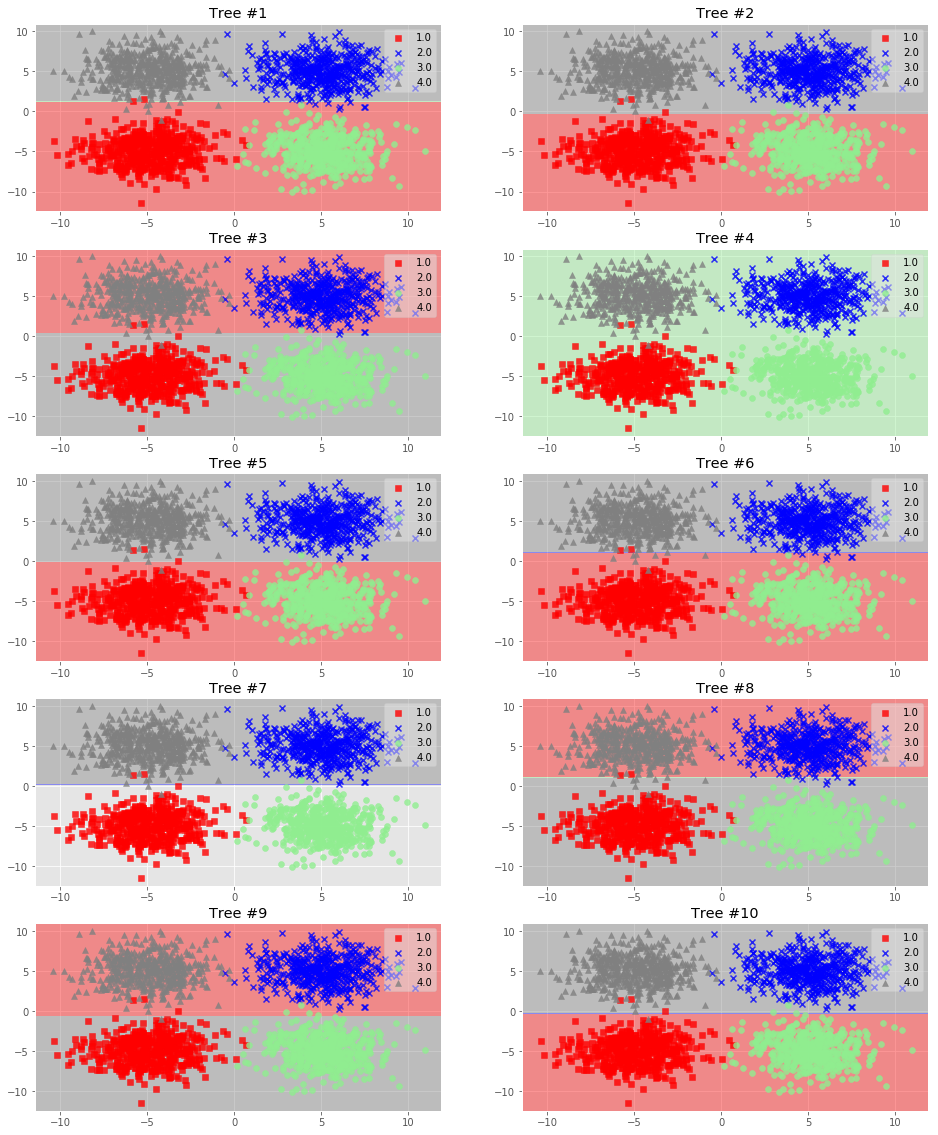

In [100]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

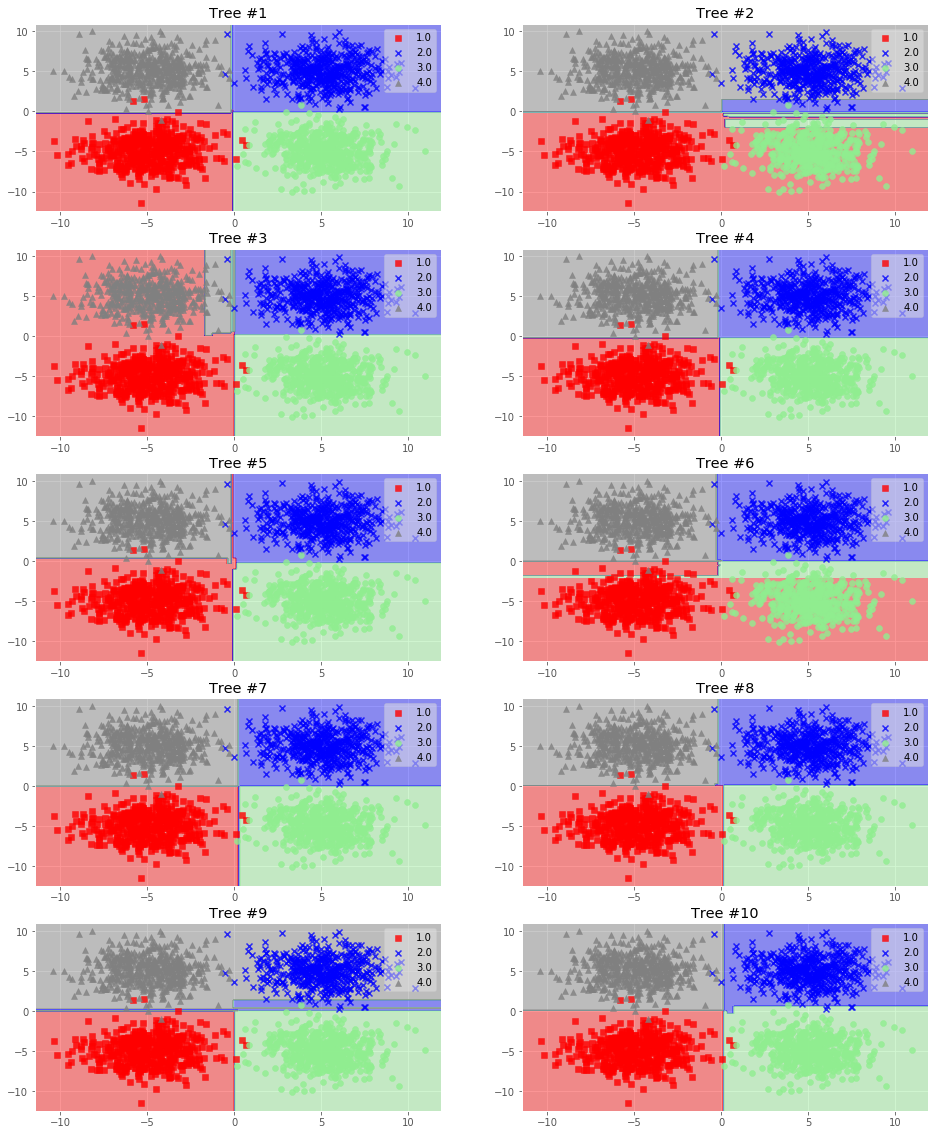

In [18]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

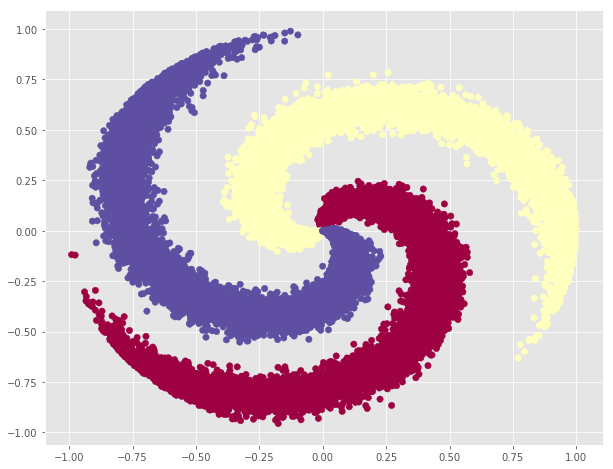

In [101]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

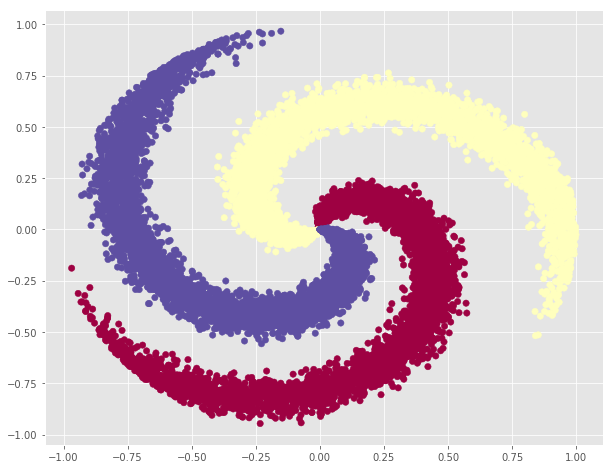

In [102]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [103]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)

In [21]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)

Creating Left Child Node With 23343 Examples, and Right Node with 6657 Examples
Creating Left Child Node With 15754 Examples, and Right Node with 7589 Examples
Creating Left Child Node With 3555 Examples, and Right Node with 12199 Examples
Creating Left Child Node With 1671 Examples, and Right Node with 1884 Examples
Creating Left Child Node With 285 Examples, and Right Node with 1386 Examples
C(posterior=[],class=0,Purity=0.99298245614)
C(posterior=[],class=2,Purity=0.994227994228)
Creating Left Child Node With 961 Examples, and Right Node with 923 Examples
C(posterior=[],class=2,Purity=0.701352757544)
C(posterior=[],class=2,Purity=0.632719393283)
Creating Left Child Node With 5326 Examples, and Right Node with 6873 Examples
Creating Left Child Node With 3275 Examples, and Right Node with 2051 Examples
C(posterior=[],class=2,Purity=0.635419847328)
C(posterior=[],class=2,Purity=0.795709410044)
Creating Left Child Node With 3680 Examples, and Right Node with 3193 Examples
C(posterior=[]

C(posterior=[],class=2,Purity=0.999275887038)
Creating Left Child Node With 274 Examples, and Right Node with 830 Examples
C(posterior=[],class=0,Purity=1.0)
C(posterior=[],class=2,Purity=1.0)
Creating Left Child Node With 17394 Examples, and Right Node with 8336 Examples
Creating Left Child Node With 6828 Examples, and Right Node with 10566 Examples
Creating Left Child Node With 3850 Examples, and Right Node with 2978 Examples
Creating Left Child Node With 1396 Examples, and Right Node with 2454 Examples
C(posterior=[],class=0,Purity=1.0)
C(posterior=[],class=2,Purity=0.995517522412)
Creating Left Child Node With 2719 Examples, and Right Node with 259 Examples
C(posterior=[],class=2,Purity=0.780801765355)
C(posterior=[],class=0,Purity=0.579150579151)
Creating Left Child Node With 6254 Examples, and Right Node with 4312 Examples
Creating Left Child Node With 6027 Examples, and Right Node with 227 Examples
C(posterior=[],class=1,Purity=0.94956031193)
C(posterior=[],class=2,Purity=0.9867

C(posterior=[],class=0,Purity=0.962301587302)
C(posterior=[],class=1,Purity=1.0)
C(posterior=[],class=1,Purity=0.996687523003)


In [104]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,850,4818,4332,10000
1,6262,99,3639,10000
2,2101,3843,4056,10000
All,9213,8760,12027,30000


In [22]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000L,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9924,55,21,10000
1,11,9986,3,10000
2,32,529,9439,10000
All,9967,10570,9463,30000


In [23]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000L,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4967,27,6,5000
1,4,4995,1,5000
2,16,270,4714,5000
All,4987,5292,4721,15000


In [24]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000L, 2L)
[0, 1, 2]


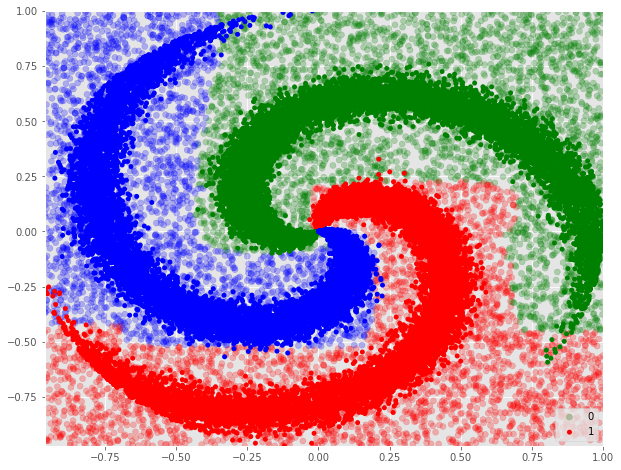

In [25]:
t.plot_points_range(rfc,X,Y)

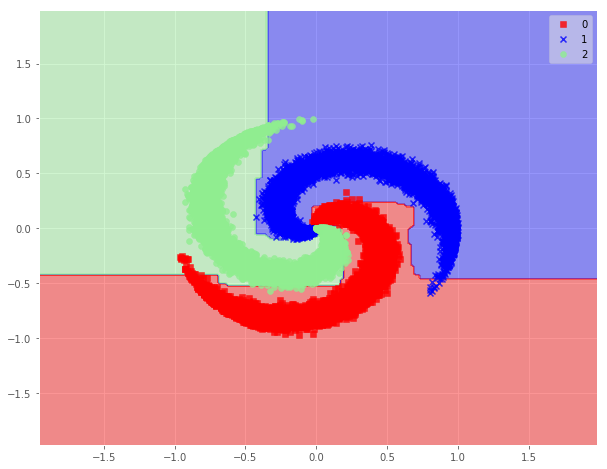

In [26]:
t.plot_decision_regions(X,Y,rfc)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

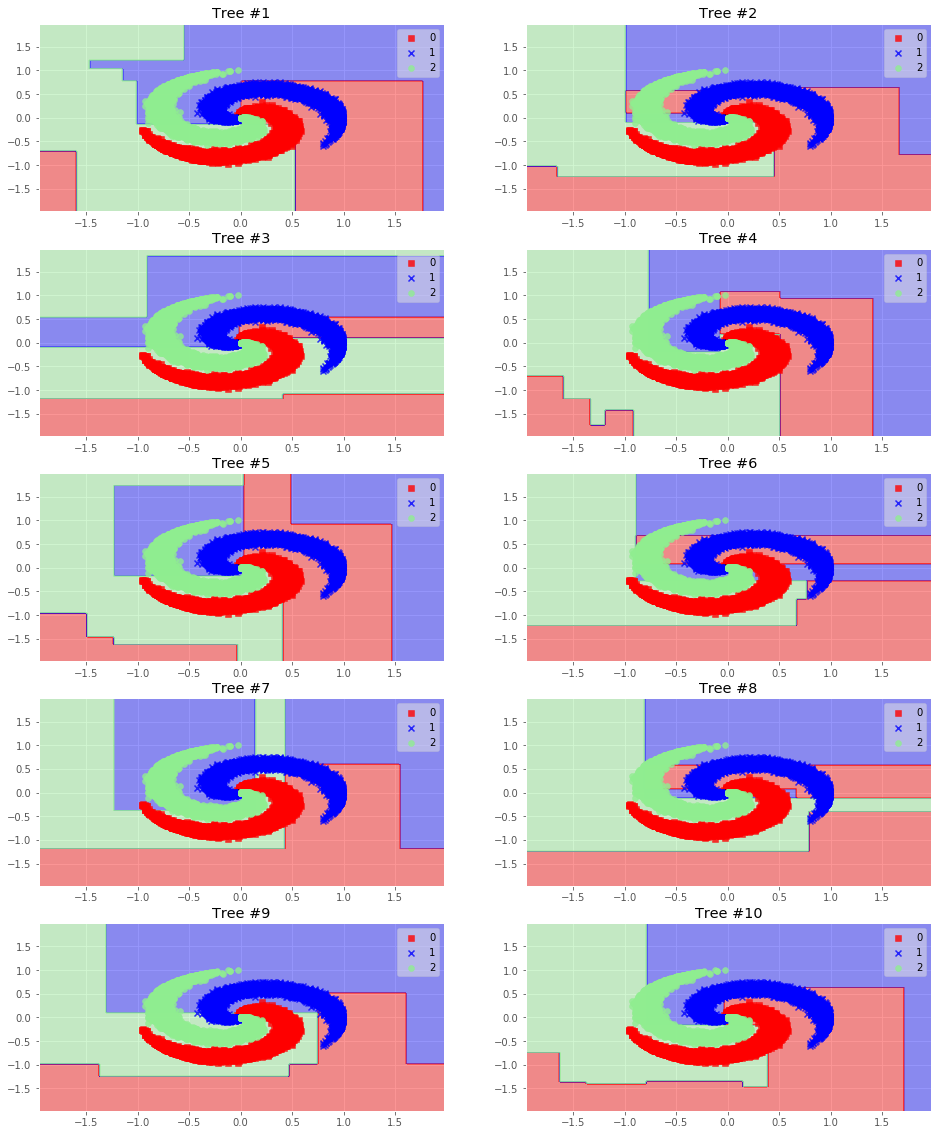

In [27]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

## TODO: Find Optimal Number of Trees for this data set, using cross validation...